## Support Vector Regression

### Linear Support Vector Regression

For **linear regression**, we apply Ordinary Least Squares to minimize the error.

For **SVR**, instead of a line, we have a **tube** - Epsilon-Intensive Tube.
   * For any value that falls within this tube, we **disregard** the error.
   * Provides a little bit of buffer to our model.
   * For the values outside the tube, we **care** about the error.
       * the one with '*' is below the tube.
       * These points outside the tube will determine how to tube will look like
   * Essentially, all points are vectores.
       * The highlighted points outside are the **Support Vectors**.

<img src='../../resources/svr/graph.png' />

<img src='../../resources/svr/equation.png' />

Basically, the formula has an important idea: To minimize the sum of error distances

### Non-linear Support Vector Regression

There are many different types of SVR, we will get back to this in the future.
<img src='../../resources/svr/graph_3d.png' />

<hr />

We have to apply **feature scaling** as the model has implicit equation, implicit relationship between x and y, as we do not have coefficient to compensate the features.
   * Not compensating lower values & high values without coefficient to each features.
   
Unlike previous example at **preprocessing**, we do not have apply feature scaling to y as it has values between 0 & 1.
   * But for now, dependent variable is not the case, we have to do feature scaling on it.
   * Otherwise, it will not work.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing data

In [54]:
df = pd.read_csv('data/position_salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [55]:
X = df.drop(['Salary', 'Position'], axis=1).values
y = df['Salary'].values

In [56]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [57]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [58]:
y.shape

(10,)

In [59]:
y = y.reshape(len(y), 1)

In [60]:
y.shape

(10, 1)

In [61]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

### Feature Scaling

As there is no need to split the data, we can perform feature scaling.

In [62]:
from sklearn.preprocessing import StandardScaler

# Use different instance as each instance will be fitted
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)

In [63]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [64]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

### Training SVR model on the entire dataset

<img src='../../resources/svr/kernels.png' />

**RBF Kernel** is most popular & recommended.
   * Kernels can learn linear & non-linear relationship

In [65]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf')

regressor.fit(X, y)

C:\Users\linta\anaconda3\envs\data_science_playground\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

### Predicting result

Transforming y scale back to original.

In [66]:
def input_pred_X(value):
    return sc_X.transform([[value]]) # Scale to the training scale

In [67]:
sc_y.inverse_transform(regressor.predict(input_pred_X(6.5)).reshape(-1, 1)) # Reverse back to original scale

array([[170370.0204065]])

### Visualizing SVR result

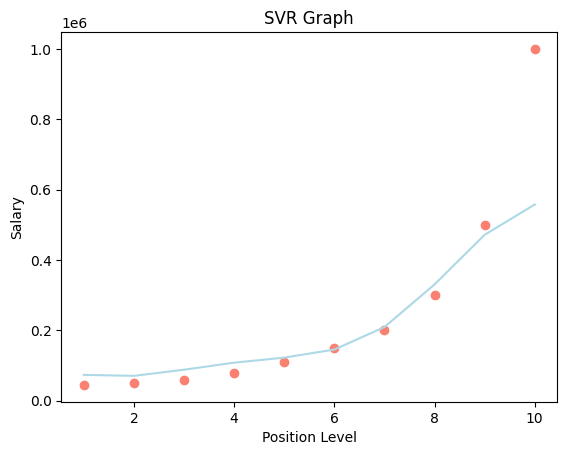

In [73]:
X_org_scale = sc_X.inverse_transform(X)
y_org_scale = sc_y.inverse_transform(y)
y_preds_org_scale = sc_y.inverse_transform(regressor.predict(X).reshape(-1, 1)) # X is already scaled

plt.scatter(X_org_scale, y_org_scale, color='salmon')
plt.plot(X_org_scale, y_preds_org_scale, color='lightblue')
plt.title('SVR Graph')
plt.xlabel('Position Level')
plt.ylabel('Salary');